# Problem Statement - Logistic Regression

*An education company named X Education sells online courses to industry professionals. The X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80 percent*

In [3]:
# Importing the libraries
import numpy as np # Data Processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import pandas as pd # Data Processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Creating dummies for categorical variable
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE # for automated feature_selection from SKLEARN
from sklearn.linear_model import LogisticRegression # Logistic Regression from SKLEARN
import statsmodels.api as sm # Linear Regression from STATSMODEL
from sklearn.model_selection import train_test_split # to split data into the Training set and Test set
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check the VIF
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Data understanding, preparation and EDA

## Importing and Inspecting Data

In [49]:
#import files - Data load
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [50]:
#data volume
df.shape

(9240, 37)

In [51]:
#provides the summary stats of dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [52]:
df['Lead Source'].value_counts(normalize = True)

Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: proportion, dtype: float64

In [53]:
#data columns, data type & data range
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Missing values check

In [55]:
#check for null values in applicaiton data
round(df.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [56]:
df['City'].value_counts()/100

City
Mumbai                         32.22
Select                         22.49
Thane & Outskirts               7.52
Other Cities                    6.86
Other Cities of Maharashtra     4.57
Other Metro Cities              3.80
Tier II Cities                  0.74
Name: count, dtype: float64

In [57]:
df['Specialization'].value_counts()/100

Specialization
Select                               19.42
Finance Management                    9.76
Human Resource Management             8.48
Marketing Management                  8.38
Operations Management                 5.03
Business Administration               4.03
IT Projects Management                3.66
Supply Chain Management               3.49
Banking, Investment And Insurance     3.38
Travel and Tourism                    2.03
Media and Advertising                 2.03
International Business                1.78
Healthcare Management                 1.59
Hospitality Management                1.14
E-COMMERCE                            1.12
Retail Management                     1.00
Rural and Agribusiness                0.73
E-Business                            0.57
Services Excellence                   0.40
Name: count, dtype: float64

### Data cleansing / reduction
though the Leads data is a smaller data set, reducing data further by dropping attributes where
- majority data is null (or)
- which are do not add value for analysis (or)
- based on the column description will help focus on the required information


**City** and **Specialization** categorical variables are dropped for the following reasons:
- Each of these variables have ~15% of the data being NULL respectively
- Additionally, City has ~22.5% of the data with 'Select' values and Specialization has ~19% of the data with 'Select' values, based the problem stmt these values is as good as a null value which means the customer had not selected this option while filling the form.

 

Also, based on the column description the following variables dropped from the dataset
- **Prospect ID** A unique ID with which the customer is identified
- **Lead Number** A lead number assigned to each lead procured
- **Last Notable Activity** The last notable acitivity performed by the student , the variable is similar to **Last Activity**. Hence to reduce the redundancy, dropping the **Last Notable Activity** variable

In [62]:
#checking the attributes with >= 15% values being nulls
list(df.columns[round(df.isnull().mean()*100,2) >= 15])

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [63]:
#attributes from the subset dataframe dropped from further analysis based on the above assessment and by the column description
df_sub = df.drop(['Country',
 'Specialization',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score','Prospect ID','Lead Number',
 'How did you hear about X Education','Last Notable Activity'], axis=1)
df_sub.shape

(9240, 23)

Retaining following variables - 
**'What is your current occupation', 'What matters most to you in choosing a course'** 
depsite >20% data is NULL based on the nature of variables as these could be influential on the Lead Score

In [65]:
df_sub.rename(columns={
                      'What is your current occupation' : 'Occupation',
                      'What matters most to you in choosing a course' : 'Reason_of_Choice'},inplace = True)

In [66]:
df_sub.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Reason_of_Choice,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No


In [67]:
#segregate the categorical and numerical attributes for analysis
num_columns = []
category_columns = []
for i in df_sub.columns:
    if (df_sub[i].dtypes=="object") or (len(df[i].unique()) < 5):
        category_columns.append(i)
    else:
        num_columns.append(i)    

In [68]:
df_sub[num_columns].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


In [69]:
df_sub[category_columns].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Occupation,Reason_of_Choice,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No


In [70]:
category_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Last Activity',
 'Occupation',
 'Reason_of_Choice',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

## Outlier Analysis

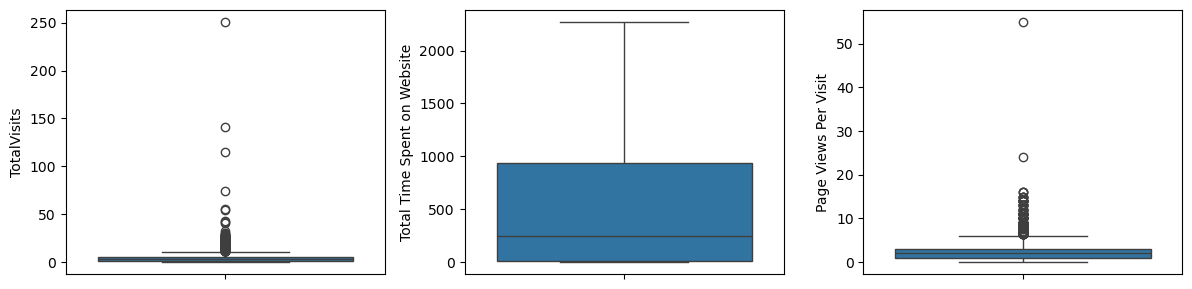

In [72]:
#Leverage SUBPLOTs and BOXPLOTs - data visualization to analyse outliers across various numerical columns
fig = plt.figure(figsize=(20,20))
nrow = 7  # number of rows
ncol = 5  # number of columns
itr = 1  # initialize plot counter
for i in num_columns:
    plt.subplot(nrow, ncol, itr)
    sns.boxplot(df[i])
    itr = itr + 1

fig.tight_layout()
plt.show()

- It is observed the attributes **TotalVisits** and **Page Views Per Visit** have data points above the upper whisker respectively. Hence, assessing data further to understand the distribution.

In [74]:
df_sub['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [75]:
df_sub['TotalVisits'].quantile([0.80,0.85,0.90,0.99])

0.80     5.0
0.85     6.0
0.90     7.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [76]:
#calculating the iqr,lw, uw
q1=df_sub['TotalVisits'].describe()["25%"]
q3=df_sub['TotalVisits'].describe()["75%"]
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
print("iqr =",iqr,";lw =",lw,";uw =",uw)
print("records >uw =",len(df_sub[df_sub['TotalVisits'] > uw]))
print("records <lw =",len(df_sub[df_sub['TotalVisits'] < lw]))

iqr = 4.0 ;lw = -5.0 ;uw = 11.0
records >uw = 267
records <lw = 0


In [77]:
df_sub[df_sub['TotalVisits'] > 11]['Occupation'].value_counts()

Occupation
Unemployed              180
Working Professional     19
Student                   3
Other                     2
Businessman               1
Name: count, dtype: int64

In [78]:
(267/9240)*100

2.8896103896103895

In [79]:
df_sub['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [80]:
df_sub['Page Views Per Visit'].quantile([0.80,0.85,0.90,0.99])

0.80    4.0
0.85    4.0
0.90    5.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [81]:
#calculating the iqr,lw, uw
q1=df_sub['Page Views Per Visit'].describe()["25%"]
q3=df_sub['Page Views Per Visit'].describe()["75%"]
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
print("iqr =",iqr,";lw =",lw,";uw =",uw)
print("records >uw =",len(df_sub[df_sub['Page Views Per Visit'] > uw]))
print("records <lw =",len(df_sub[df_sub['Page Views Per Visit'] < lw]))

iqr = 2.0 ;lw = -2.0 ;uw = 6.0
records >uw = 360
records <lw = 0


In [82]:
df_sub[df_sub['Page Views Per Visit'] > 6]['Occupation'].value_counts()

Occupation
Unemployed              234
Working Professional     26
Student                   6
Businessman               2
Other                     2
Name: count, dtype: int64

In [83]:
(360/9240)*100

3.896103896103896

In [84]:
df_sub['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [85]:
df_sub['Total Time Spent on Website'].quantile([0.80,0.85,0.90,0.99])

0.80    1087.20
0.85    1233.15
0.90    1380.00
0.99    1840.61
Name: Total Time Spent on Website, dtype: float64

In [86]:
#calculating the iqr,lw, uw
q1=df_sub['Total Time Spent on Website'].describe()["25%"]
q3=df_sub['Total Time Spent on Website'].describe()["75%"]
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
print("iqr =",iqr,";lw =",lw,";uw =",uw)
print("records >uw =",len(df_sub[df_sub['Total Time Spent on Website'] > uw]))
print("records <lw =",len(df_sub[df_sub['Total Time Spent on Website'] < lw]))

iqr = 924.0 ;lw = -1374.0 ;uw = 2322.0
records >uw = 0
records <lw = 0


**based on the above analysis**
- **TotalVisits**: ~3% records have TotalVisits value greater than Upper Whisker value. However, most of these visits are from Unemployed customers and logically these customers would be eager to upskill to get jobs. Hence NOT removing these records as outliers, instead capping the records with the upper limit values which will allow us to retain these records for further assessment
- **Page Views Per Visit**:  ~4% records have Page Viewes Per Visit value greater than Upper Whisker value. However, most of these visits are from Unemployed customers and logically these customers would be eager to upskill to get jobs. Hence NOT removing these records as outliers, instead capping the records with the upper limit values which will allow us to retain these records for further assessment

## Outlier treatment - Data Imputation of Numeric Vairables

In [89]:
#calculating the iqr,lw, uw for TotalVisits
q1=df_sub['TotalVisits'].describe()["25%"]
q3=df_sub['TotalVisits'].describe()["75%"]
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
df_sub['TotalVisits'] = np.where(df_sub['TotalVisits']>uw, uw,
                                          np.where(df_sub['TotalVisits'] < lw,lw,
                                                   df_sub['TotalVisits']))
print("records >uw =",len(df_sub[df_sub['TotalVisits'] > uw]))
print("records <lw =",len(df_sub[df_sub['TotalVisits'] < lw]))

records >uw = 0
records <lw = 0


In [90]:
print(df_sub['TotalVisits'].isna().mean())
total_visit_imputer= df_sub['TotalVisits'].median()
df_sub['TotalVisits'].fillna(total_visit_imputer, inplace= True)
print(df_sub['TotalVisits'].isna().mean())

0.014826839826839827
0.0


In [91]:
#calculating the iqr,lw, uw for Page Views Per Visit
q1=df_sub['Page Views Per Visit'].describe()["25%"]
q3=df_sub['Page Views Per Visit'].describe()["75%"]
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
df_sub['Page Views Per Visit'] = np.where(df_sub['Page Views Per Visit']>uw, uw,
                                          np.where(df_sub['Page Views Per Visit'] < lw,lw,
                                                   df_sub['Page Views Per Visit']))
print("records >uw =",len(df_sub[df_sub['Page Views Per Visit'] > uw]))
print("records <lw =",len(df_sub[df_sub['Page Views Per Visit'] < lw]))

records >uw = 0
records <lw = 0


In [92]:
print(df_sub['Page Views Per Visit'].isna().mean())
pgvisit_imputer= df_sub['Page Views Per Visit'].median()
df_sub['Page Views Per Visit'].fillna(pgvisit_imputer, inplace= True)
print(df_sub['Page Views Per Visit'].isna().mean())

0.014826839826839827
0.0


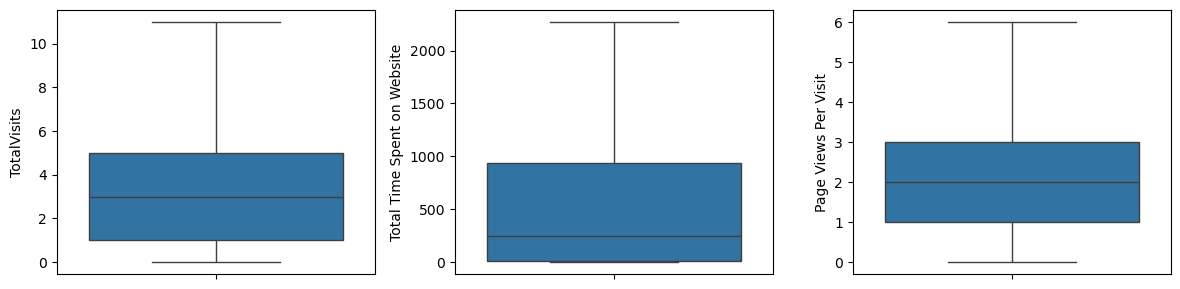

In [93]:
#Leverage SUBPLOTs and BOXPLOTs - data visualization post outlier treatment across various numerical columns
fig = plt.figure(figsize=(20,20))
nrow = 7  # number of rows
ncol = 5  # number of columns
itr = 1  # initialize plot counter
for i in num_columns:
    plt.subplot(nrow, ncol, itr)
    sns.boxplot(df_sub[i])
    itr = itr + 1

fig.tight_layout()
plt.show()

## Categorical Variable Analysis

In [95]:
# UDF to display value_counts for the required attributes to analyse the data distribution
def value_cnt_calculation(inp_data, inp_lst):
    for i in inp_lst:
        print((inp_data[i].value_counts()))
        print('-----------------------------------------------')

In [96]:
# value_cnt_calculation function call on specific attributes
value_cnt_calculation(df_sub,category_columns)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-----------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
-----------------------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
-----------------------------------------------
Do Not Call

**Quick inference of statistical outcomes:**
- 1. Missing values observed in the given dataset for number of variables and are treated accordingly 
- 2. For Numerical features:
        - the min/max values are in positive range
        - based on the data analysis outliers observed and treated
- 3. For Categorical features:
        - as shown above the unique values & distribution of all categorical values are assessed

#### Creating binary values (Yes/No) to 1/0

In [99]:
# Map/encode the values of the categorical variables 
var_list = ['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df_sub[var_list] = df_sub[var_list].apply(binary_map)

In [100]:
df_sub.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,Reason_of_Choice,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0


### Data Formatting / Standardise Values of Categorical Variable with multiple levels

#### Data Imputation of Categorical Vairables

In [103]:
df_sub['Lead Origin']= df_sub['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form' ],'Others')
df_sub['Lead Source']= df_sub['Lead Source'].replace({'google':'Google'})

# reducing the multiple categories to lesser categories to help the assessment

lead_source_catgeories = ['Google', 'Direct Traffic','Olark Chat','Organic Search','Reference', np.nan]
df_sub['Lead Source']= df_sub['Lead Source'].map(lambda x: x if x in lead_source_catgeories else 'Others')

# Categories post reduction
df_sub['Lead Source'].value_counts(dropna= False)

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             345
NaN                 36
Name: count, dtype: int64

In [104]:
# Imputation with mode value
lead_source_imputer= df_sub['Lead Source'].mode()[0]
df_sub['Lead Source'].fillna(lead_source_imputer, inplace= True)
df_sub['Lead Source'].value_counts(dropna= False)

Lead Source
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             345
Name: count, dtype: int64

In [105]:
# Grouping Last Activity into 3 groups

positive_response = ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 'Form Submitted on Website', 
               'Approached upfront', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']
neutral_response= ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']
negative_response= ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']

df_sub['Last Activity']= df_sub['Last Activity'].replace(positive_response, 'positive')
df_sub['Last Activity']= df_sub['Last Activity'].replace(negative_response, 'negative')
df_sub['Last Activity']= df_sub['Last Activity'].replace(neutral_response, 'neutral')

df_sub['Last Activity'].value_counts(dropna= False)

Last Activity
neutral     4442
positive    4213
negative     482
NaN          103
Name: count, dtype: int64

In [106]:
# Imputation with mode value
LastActivity_imputer= df_sub['Last Activity'].mode()[0]
df_sub['Last Activity'].fillna(LastActivity_imputer, inplace= True)
df_sub['Last Activity'].value_counts(dropna= False)

Last Activity
neutral     4545
positive    4213
negative     482
Name: count, dtype: int64

In [107]:
# Imputation and data standardize
df_sub['Occupation'].fillna('Not Revealed', inplace= True)
df_sub['Occupation']= df_sub['Occupation'].replace(['Housewife','Businessman'], 'Other')
df_sub['Occupation'].value_counts(dropna= False)

Occupation
Unemployed              5600
Not Revealed            2690
Working Professional     706
Student                  210
Other                     34
Name: count, dtype: int64

In [108]:
# Analysing/visualizing the categorical columns

def plots (category_columns): 
    plt.figure(figsize=(20, 30))
    for i in enumerate(category_columns):
        plt.subplot(7, 3, i[0]+1)
        plt.subplots_adjust(hspace=2)
        sns.countplot(x=i[1],data=df_sub, hue = 'Converted')
        plt.xticks(rotation = 90)
    plt.show()

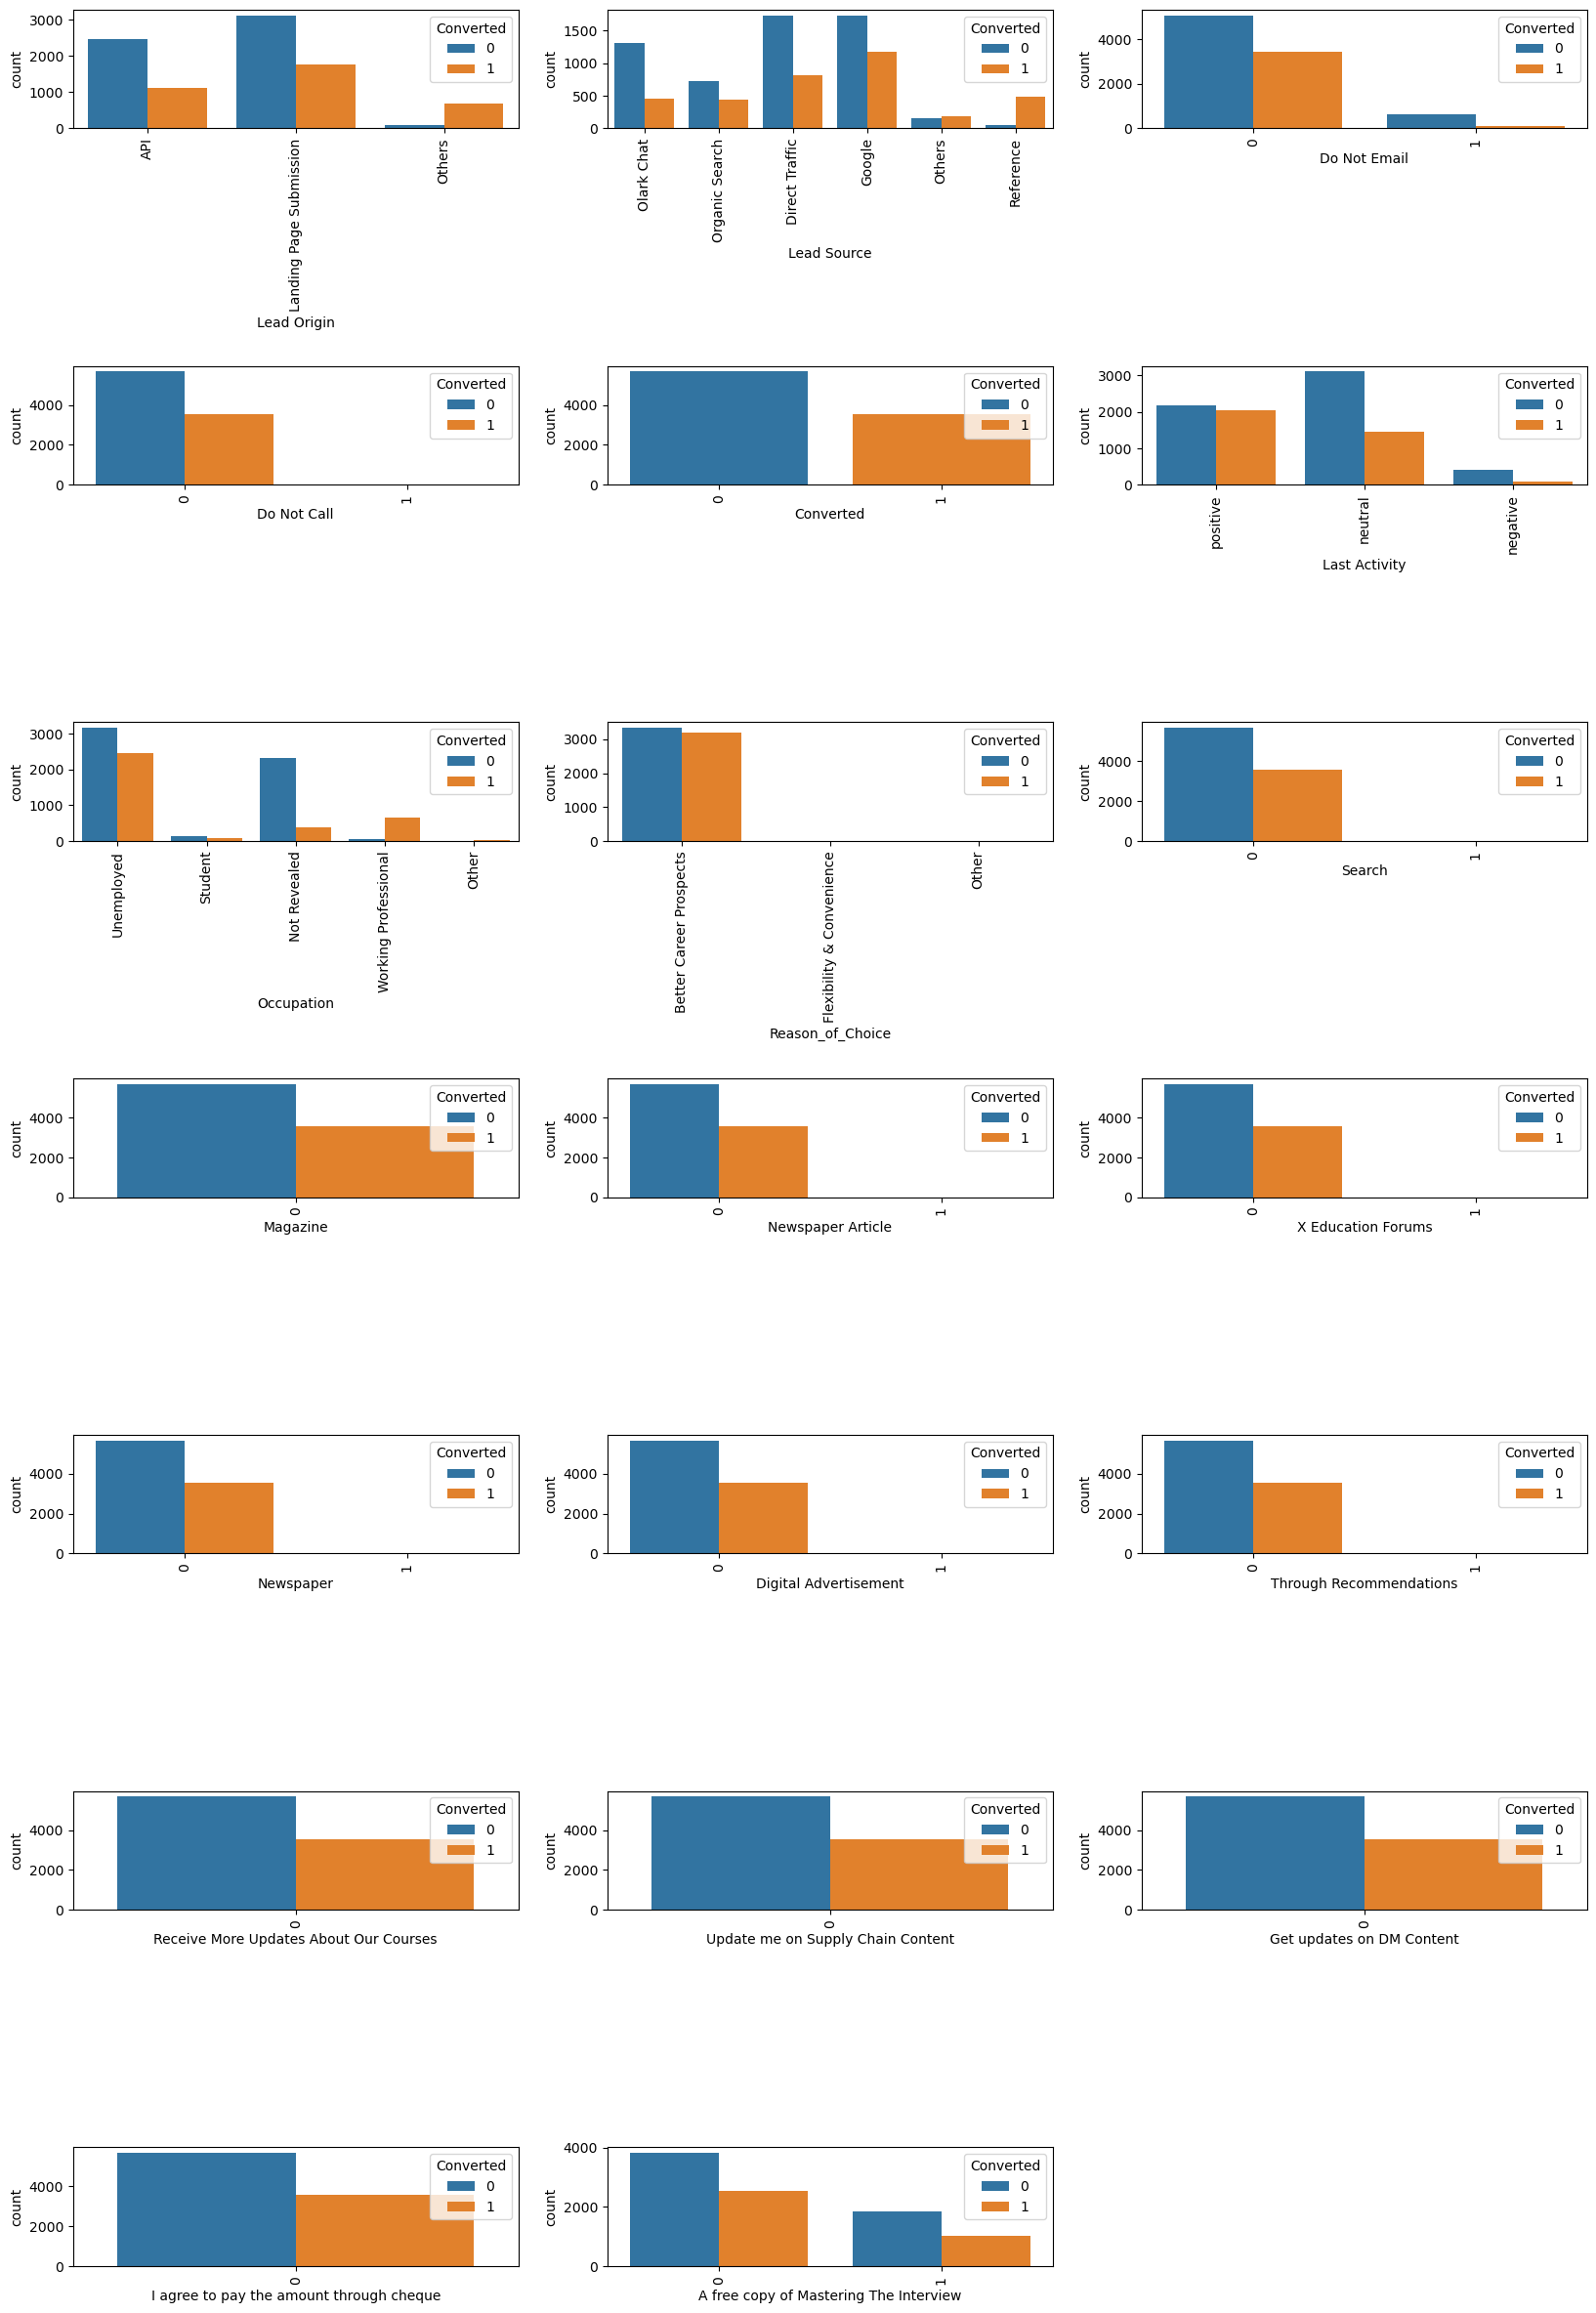

In [109]:
plots (category_columns)

#### for Categorical Variable with multiple levels, create dummy features(one-hot encoded) 

In [111]:
#create dummy variables using pd.get_dummies for categorical data in quantitative analysis as numeric stand-in for a qualitative fact or a logical proposition
df_new = pd.get_dummies(df_sub, columns = ['Lead Origin', 'Lead Source', 'Occupation','Reason_of_Choice','Last Activity'], drop_first = True)

In [112]:
df_new.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Reason_of_Choice_Flexibility & Convenience,Reason_of_Choice_Other,Last Activity_neutral,Last Activity_positive
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [113]:
df_new.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Reason_of_Choice_Flexibility & Convenience', 'Reason_of_Choice_Other',
       'Last Activity_neutral', 'Last Activity_positive'],
      dtype='object')

In [114]:
#data formatting helps to scale the features
convt_list = ['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Reason_of_Choice_Flexibility & Convenience', 'Reason_of_Choice_Other',
       'Last Activity_neutral', 'Last Activity_positive']
df_new[convt_list] = df_new[convt_list].apply(lambda x: x.astype(int))

In [115]:
#check for null values again post data transformation
nan_rows = df_new.isna().mean()
print(nan_rows)

Do Not Email                                  0.0
Do Not Call                                   0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
Search                                        0.0
Magazine                                      0.0
Newspaper Article                             0.0
X Education Forums                            0.0
Newspaper                                     0.0
Digital Advertisement                         0.0
Through Recommendations                       0.0
Receive More Updates About Our Courses        0.0
Update me on Supply Chain Content             0.0
Get updates on DM Content                     0.0
I agree to pay the amount through cheque      0.0
A free copy of Mastering The Interview        0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Others                            0.0


In [116]:
# split the data into Train and Test datasets for model building
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100) #controls the random number generator used to shuffle the data

In [117]:
df_train.shape

(6468, 33)

In [118]:
df_test.shape

(2772, 33)

In [119]:
# Using MinMaxScaler to scale the features into a fixed range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [120]:
# Apply MinMaxScaler() to all the relevant numerical variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [121]:
df_train.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Reason_of_Choice_Flexibility & Convenience,Reason_of_Choice_Other,Last Activity_neutral,Last Activity_positive
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,0.381262,0.292025,0.212974,0.363069,0.001701,0.0,0.000309,0.000155,0.000155,0.000464,0.001082,0.0,0.0,0.0,0.0,0.311843,0.528139,0.084725,0.320810,0.190167,0.121058,0.036178,0.060297,0.003556,0.021027,0.605133,0.077613,0.000309,0.000155,0.487168,0.461503
std,0.268799,0.017583,0.485734,0.260221,0.240566,0.296305,0.041207,0.0,0.017583,0.012434,0.012434,0.021533,0.032882,0.0,0.0,0.0,0.0,0.463282,0.499246,0.278493,0.466824,0.392463,0.326219,0.186748,0.238054,0.059530,0.143484,0.488860,0.267582,0.017583,0.012434,0.499874,0.498554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.090909,0.005282,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.272727,0.108275,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.454545,0.407790,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 50x100 with 0 Axes>

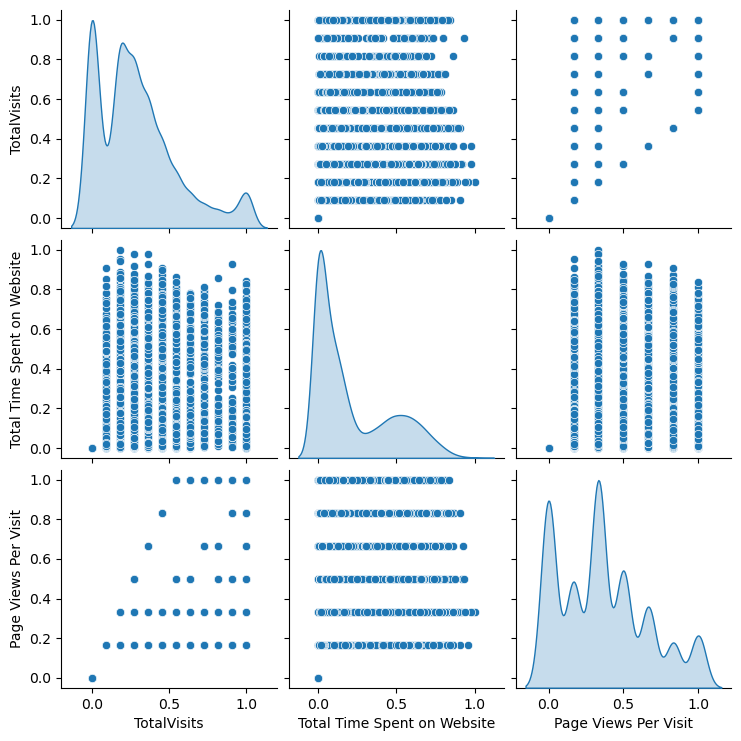

In [122]:
# pair-plot to visualize the correlation among the variables
plt.figure(figsize=[0.5,1])
sns.pairplot(df_train.select_dtypes(include= ['int64','float64']), diag_kind= 'kde')
plt.show()

In [123]:
## Features with a training-set variance lower than this threshold are removed
var_t= VarianceThreshold(threshold= .001)
variance_thresh= var_t.fit(df_train)
col_ind= var_t.get_support()

# Below columns have very low variance
df_train.loc[:, ~col_ind].columns

Index(['Do Not Call', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'Reason_of_Choice_Flexibility & Convenience', 'Reason_of_Choice_Other'],
      dtype='object')

In [124]:
df_train= df_train.loc[:, col_ind]
df_test = df_test.loc[:, col_ind]
df_train.shape

(6468, 21)

In [125]:
df_test.shape

(2772, 21)

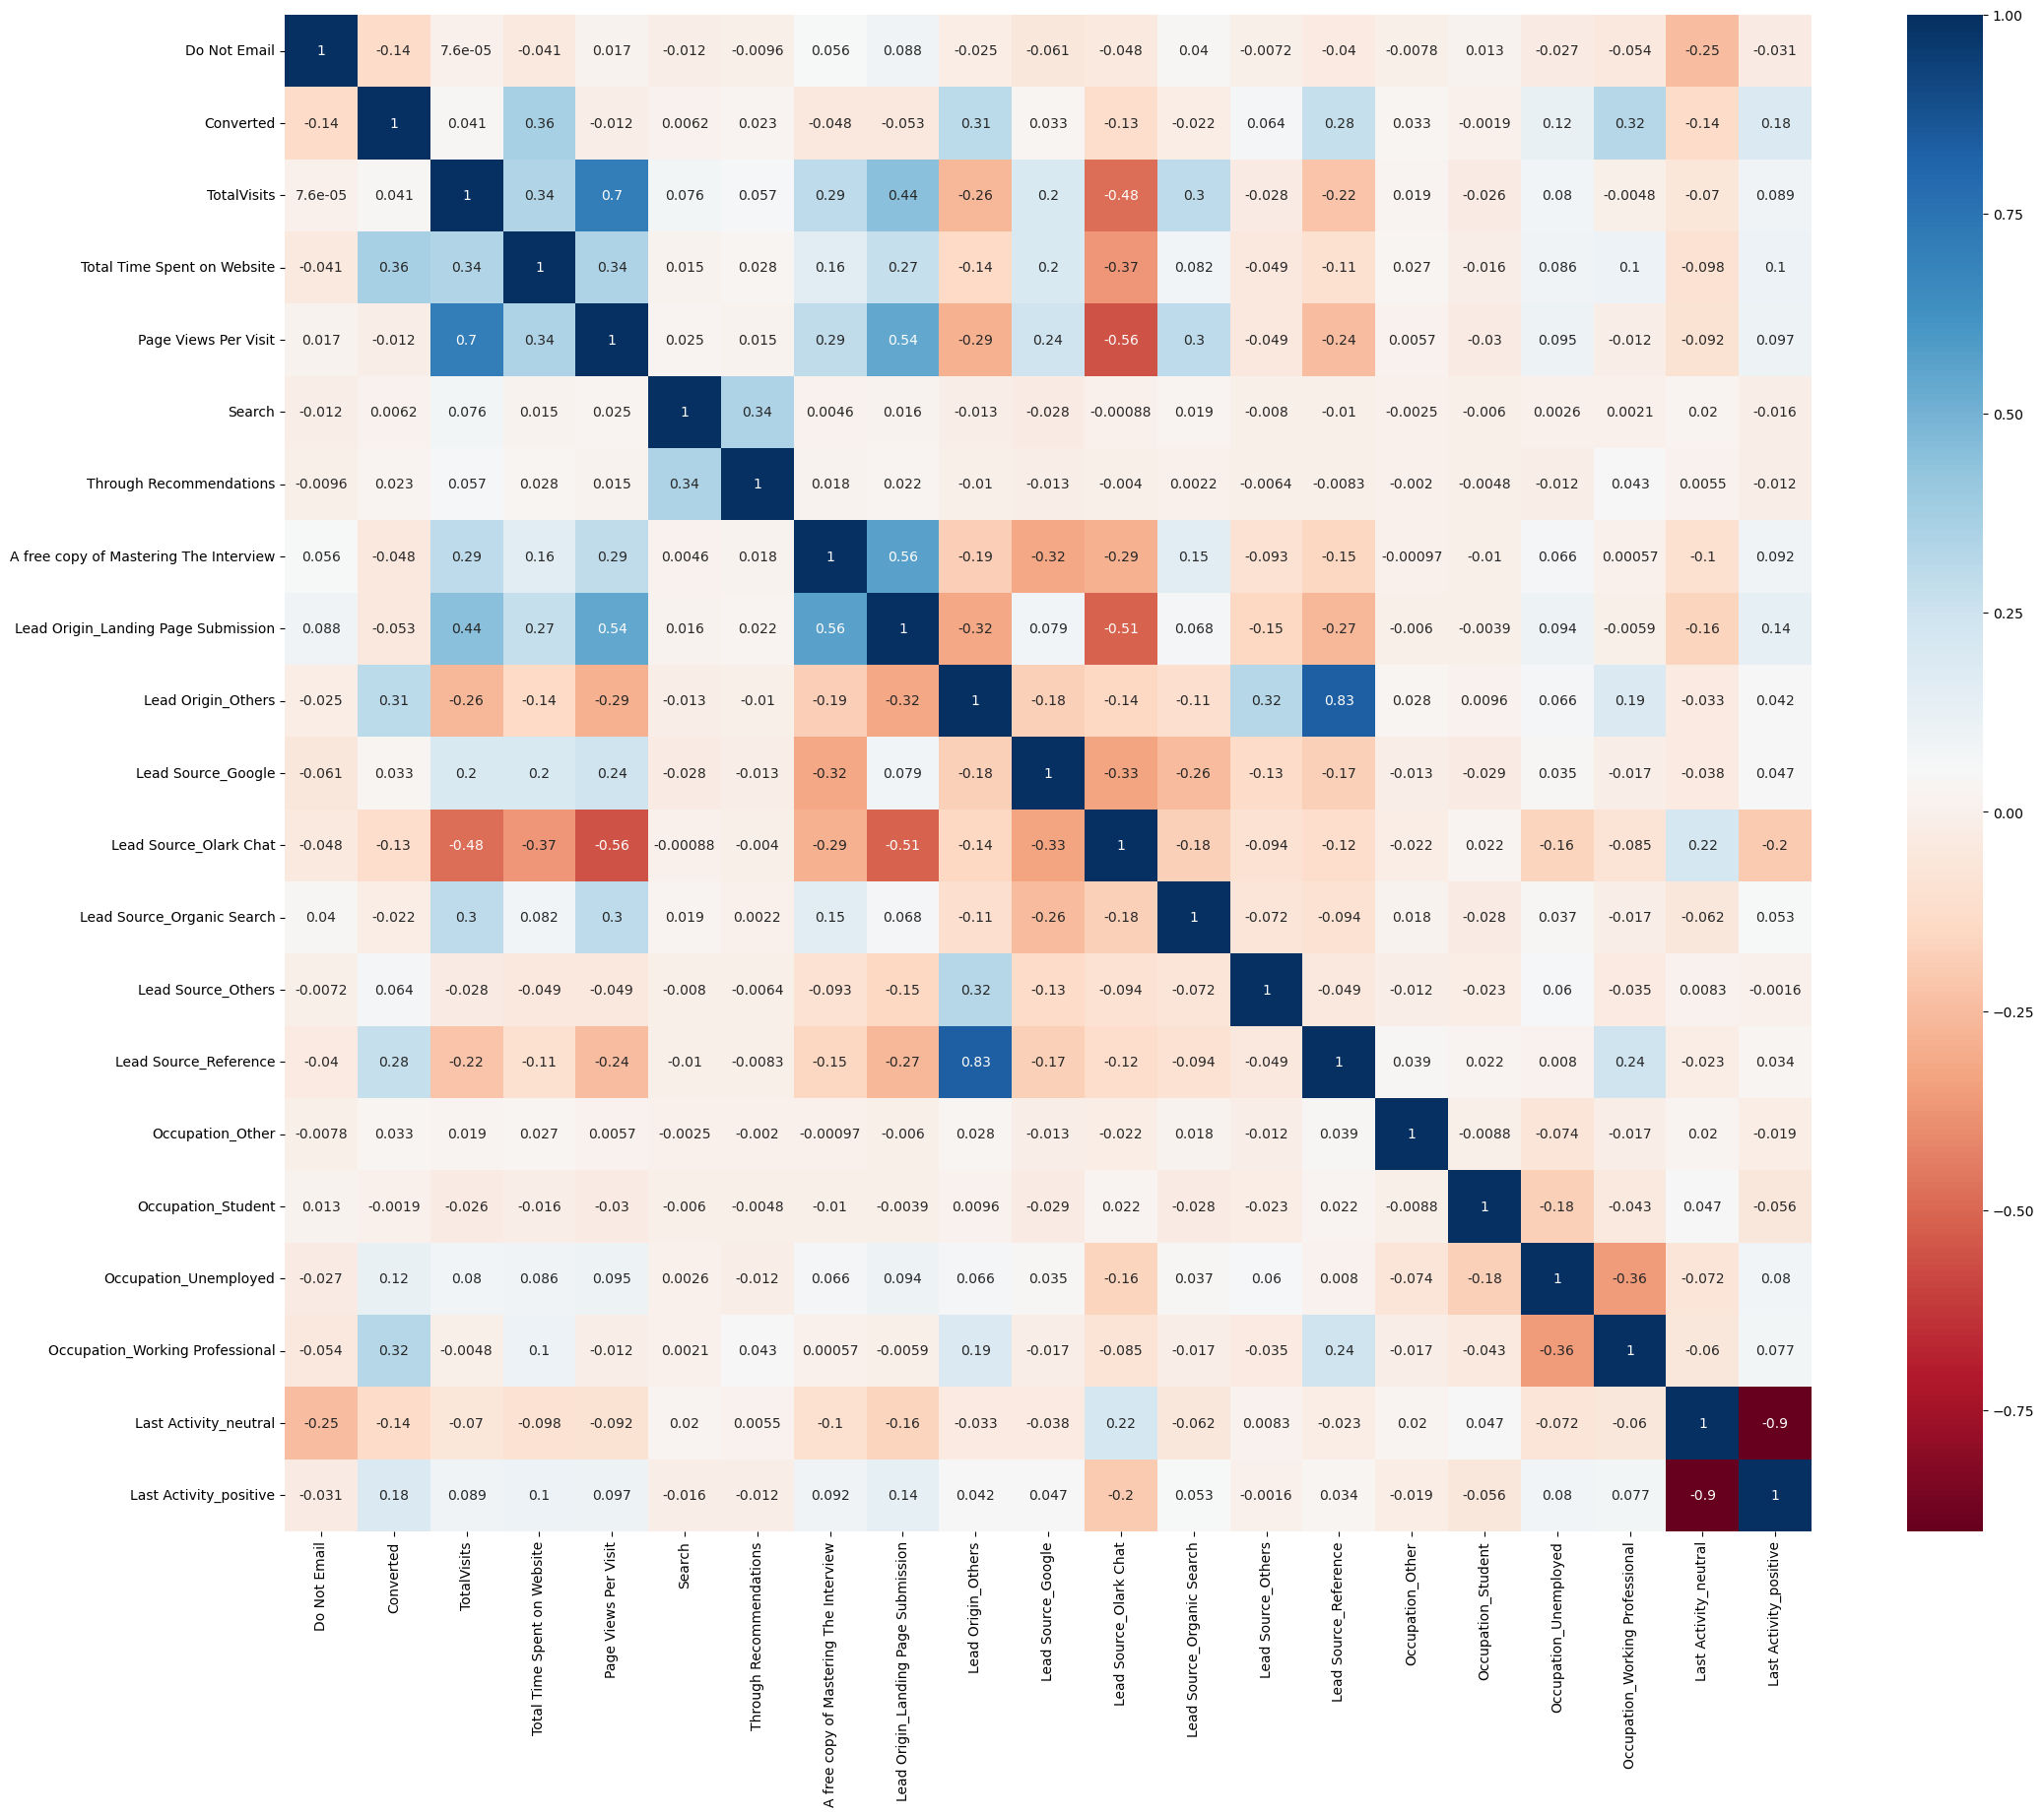

In [126]:
# Correlation matrix - mutlivariate attribute analysis to find correlation across each of the attributes
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), cmap="RdBu", annot=True)
plt.show()

- heatmap confirms the independent variables -
    - **Lead Origin_Other & Lead Source_Reference** are highly correlated (0.83)
    - **TotalVisits & Page Views Per Visit** are highly correlated (0.70)

# Build the MultiVariate Logistic Regression Model using the hybrid(RFE and Manual) feature selection
- **automated feature selection** : using the LinearRegression function from SKLearn (for its compability with RFE utility)
- **manual feature selection** : using the statsmodels to study detailed statistical summary and make necessary decisions on the features selection

In [129]:
# define X_train, y_train for the Logistic Regression Model

y_train = df_train.pop('Converted') # dependent variable
X_train = df_train #predictor variables

In [130]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_neutral,Last Activity_positive
1871,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
6795,0,0.363636,0.214349,0.166667,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
3516,0,0.454545,0.046655,0.333333,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
8105,0,0.454545,0.541373,0.833333,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3934,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [131]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int32

In [132]:
X_train.shape

(6468, 20)

In [133]:
y_train.shape

(6468,)

### Starting with automated feature selection using SKLearn

In [135]:
# running Recursive feature elimination with the output no. of the variable equal to 10
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
rfe= rfe.fit(X_train, y_train)

In [136]:
#mapping the columns and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 9),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_neutral', False, 5),
 ('Last Activity_positive', True, 1)]

In [137]:
# RFE selected variables displayed
rfe_selected_col = X_train.columns[rfe.support_]
print(rfe_selected_col)

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Activity_positive'],
      dtype='object')


In [138]:
#create the X train dataframe with RFE selected variables
X_train_RFE = X_train[rfe_selected_col]

In [139]:
X_train_RFE.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Others,Lead Source_Olark Chat,Lead Source_Reference,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_positive
1871,0,0.000000,0,1,0,0,0,1,0,0
6795,0,0.214349,0,0,0,0,0,1,0,0
3516,0,0.046655,0,1,0,0,0,1,0,0
8105,0,0.541373,0,0,0,0,0,1,0,1
3934,0,0.000000,0,1,0,0,0,1,0,0


### Build MultiVariate Logistic Model based on the RFE selected variables using 'STATS MODEL'

## Model 1

In [142]:
# verifying the Variance Inflation Factor values of the X_train variables

vif = pd.DataFrame()
X = X_train_RFE
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Others,3.66
4,Lead Source_Reference,3.57
7,Occupation_Unemployed,2.18
1,Total Time Spent on Website,1.82
9,Last Activity_positive,1.70
8,Occupation_Working Professional,1.32
3,Lead Source_Olark Chat,1.12
0,Do Not Email,1.05
6,Occupation_Student,1.04
5,Occupation_Other,1.01


In [143]:
#add constant, consider all the RFE selected variables to build the 1st model
X_train_lm1 = sm.add_constant(X_train_RFE)
lreg = sm.GLM(y_train, X_train_lm1, family= sm.families.Binomial()).fit()


In [144]:
print(lreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.2
Date:                Tue, 18 Feb 2025   Deviance:                       5770.4
Time:                        04:16:07   Pearson chi2:                 6.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3542
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model 2

**drop the Lead Source_Reference variable though its p-value 0.026 is lesser than the 0.05, as Lead Source_Reference is highly correlated to Lead Origin_Others seen in the heatmap above and based on the business problem removing this variable should not affect the Lead Score**

In [147]:
X_train_updated = X_train_RFE.drop(['Lead Source_Reference'], axis = 1)

In [148]:
# verifying the Variance Inflation Factor for the all the pending variables post the atemp removal 

vif = pd.DataFrame()
X = X_train_updated
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,2.18
1,Total Time Spent on Website,1.82
8,Last Activity_positive,1.70
7,Occupation_Working Professional,1.29
2,Lead Origin_Others,1.22
3,Lead Source_Olark Chat,1.12
0,Do Not Email,1.05
5,Occupation_Student,1.03
4,Occupation_Other,1.01


In [149]:
#add constant, consider all the RFE selected variables to build the 2nd model
X_train_lm2 = sm.add_constant(X_train_updated)
lreg = sm.GLM(y_train, X_train_lm2, family= sm.families.Binomial()).fit()


In [150]:
print(lreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.7
Date:                Tue, 18 Feb 2025   Deviance:                       5775.3
Time:                        04:16:07   Pearson chi2:                 6.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Calculate Model Evaluation Metrics

In [152]:
y_train_pred= pd.DataFrame(lreg.predict(X_train_lm2), columns=['prob'])
y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # arbitrarily chose cut-off of 0.5 wherein 
#if the probability of converting for a customer is greater than 0.5, classified it as 1 indicating Converted else 0 indicating Not Converted
y_train_pred= y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)
# calculate Confusion matrix for the selected model 2
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()

In [153]:
y_train_pred

,prob,pred_Converted,Converted
1871,0.268803,0,0
6795,0.238470,0,0
3516,0.312375,0,0
8105,0.743101,1,0
3934,0.268803,0,0
...,...,...,...
350,0.760169,1,1
79,0.993800,1,1
8039,0.268803,0,1
6936,0.285224,0,0


In [154]:
print('Model Evaluation Metrics on Train dataset with cutoff > 0.50')
print('-'* 40)

# Calculate Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# calculate model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

# calculate model Sensitivity
print('Sensitivity / Recall: ',TP / float(TP+FN))

# calculate model Specificity
print('Specificity: ', TN / float(TN+FP))

# calculate model FPR (False Positive Rate) ie., (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# calculate model Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# calculate model Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset with cutoff > 0.50
----------------------------------------
Confusion Matrix:
True Negative: 3552      False Positive: 450
False Negative: 875      True Positive: 1591 

Overall model accuracy: 0.7951453308596166
Sensitivity / Recall:  0.6451743714517437
Specificity:  0.8875562218890555
False Positive Rate:  0.11244377811094453
Positive Predictive Value:  0.7795198432141107
Positive Predictive Value:  0.8023492206912131


**Accuracy of the model is ~80% and the sensitivity metric is ~65%. The cause of such a low sensitivity would be the arbitrarily chosen cut-off of 0.5. The threshold might not be the ideal cut-off point for classification and hence resulting in low sensitivity**

**The cause of such a low sensitivity would be the arbitrarily chosen cut-off of 0.5 with no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity.**

**Visualizing the ROC Curve on the final model before changing the initial threshold**

## Plotting the ROC Curve

In [157]:
# Defining the function to plot the ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

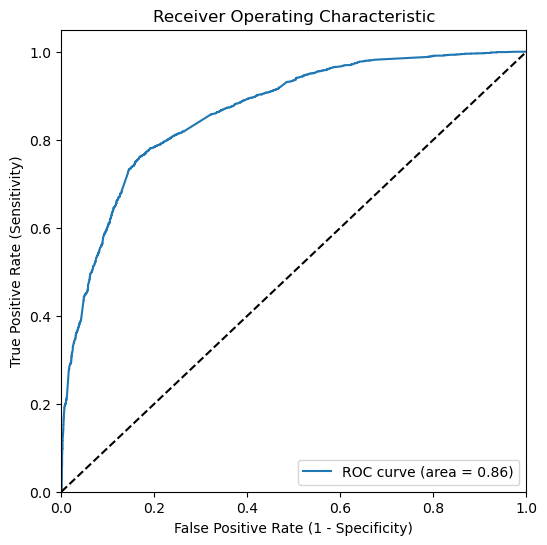

In [158]:
# Calling the ROC curve function

fpr, tpr, thresholds= roc_curve(y_train_pred.Converted, y_train_pred.prob, drop_intermediate = False )
roc_plot(y_train_pred.Converted, y_train_pred.prob)

**good ROC curve is the one which touches the upper-left corner of the graph; so higher the area under the curve of an ROC curve, the better is your model. the above graph has decent area under the curve =0.86**

## Finding Optimal Probability Cutoff Point

In [161]:
# generating various probability and respective impact on 'accuracy','sensitivity','specificity' metrics

num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

# Calculating accuracy sensitivity and specificity for various probability cutoffs.
plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.582406,0.980130,0.337331
0.2,0.2,0.691404,0.907137,0.558471
0.3,0.3,0.783859,0.797242,0.775612
0.4,0.4,0.805195,0.741281,0.844578
0.5,0.5,0.795145,0.645174,0.887556
0.6,0.6,0.783086,0.576642,0.910295
0.7,0.7,0.767316,0.489457,0.938531
0.8,0.8,0.733612,0.350770,0.969515
0.9,0.9,0.686766,0.188564,0.993753


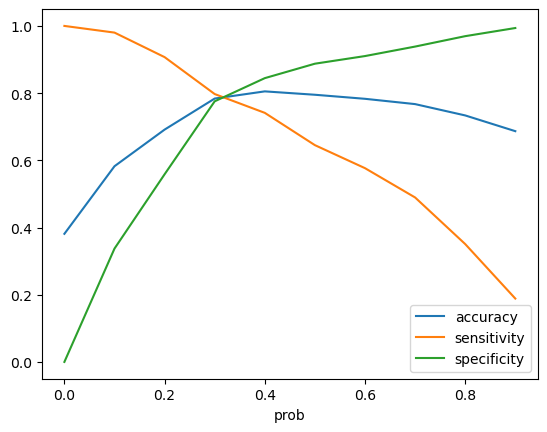

In [162]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs

plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()

**At about threshold of 0.32, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 77-78%**

## Evaluating final model on train data

In [165]:
# prediction based on probability cutoff 0.32 and add pred_final column 

y_train_pred['pred_final']= y_train_pred.prob.map(lambda x: 1 if x > .32 else 0)

In [166]:
y_train_pred.head(10)

,prob,pred_Converted,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pred_final
1871,0.268803,0,0,1,1,1,0,0,0,0,0,0,0,0
6795,0.238470,0,0,1,1,1,0,0,0,0,0,0,0,0
3516,0.312375,0,0,1,1,1,1,0,0,0,0,0,0,0
8105,0.743101,1,0,1,1,1,1,1,1,1,1,0,0,1
3934,0.268803,0,0,1,1,1,0,0,0,0,0,0,0,0
4844,0.984028,1,1,1,1,1,1,1,1,1,1,1,1,1
3297,0.123056,0,0,1,1,0,0,0,0,0,0,0,0,0
8071,0.987259,1,1,1,1,1,1,1,1,1,1,1,1,1
987,0.263258,0,0,1,1,1,0,0,0,0,0,0,0,0
7423,0.849040,1,1,1,1,1,1,1,1,1,1,1,0,1


In [167]:
print('Model Evaluation Metrics on Train dataset with cutoff > 0.32')
print('-'* 40)

# Calculate Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# calculate model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final))

# calculate model Sensitivity
print('Sensitivity / Recall: ',TP / float(TP+FN))

# calculate model Specificity
print('Specificity: ', TN / float(TN+FP))

# calculate model FPR (False Positive Rate) ie., (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# calculate model Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# calculate model Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset with cutoff > 0.32
----------------------------------------
Confusion Matrix:
True Negative: 3195      False Positive: 807
False Negative: 531      True Positive: 1935 

Overall model accuracy: 0.7931354359925789
Sensitivity / Recall:  0.7846715328467153
Specificity:  0.7983508245877061
False Positive Rate:  0.20164917541229385
Positive Predictive Value:  0.7056892778993435
Positive Predictive Value:  0.857487922705314


## Generating Lead Score on Train dataset

In [169]:
# bring in the Lead Number attribute from initial dataframe which can be beneficial information for sales team to reference
y_train_pred= y_train_pred.merge(df['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Train dataset
y_train_pred['Lead Score']= y_train_pred.prob * 100
y_train_pred= y_train_pred[['Lead Number','Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
2656,634047,1,1,0.999180,99.918024
8074,588037,1,1,0.999055,99.905549
3428,627462,1,1,0.998584,99.858407
7579,591536,1,1,0.998306,99.830578
6751,598055,1,1,0.998150,99.815048
936,650338,1,1,0.997944,99.794413
8063,588075,1,1,0.997720,99.772003
8081,588013,1,1,0.997697,99.769721
1559,643938,1,1,0.997667,99.766667
9015,581257,1,1,0.997486,99.748626


## Evaluating final model on test data

In [171]:
# define X_test, y_test for prediction

y_test = df_test.pop('Converted')
X_test = df_test

# Apply MinMaxScaler() to all the relevant numerical variables
num_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_cols]= scaler.transform(X_test[num_cols])
X_test[num_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0.727273,0.444982,1.000000
2376,0.000000,0.000000,0.000000
7766,0.454545,0.025968,0.833333
9199,0.000000,0.000000,0.000000
4359,0.000000,0.000000,0.000000


In [172]:
# retain only required columns in test dataset

test_cols= list(X_train_lm2.columns)
test_cols.remove('const')
X_test= X_test[test_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Others,Lead Source_Olark Chat,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_positive
4269,0,0.444982,0,0,0,0,0,0,1
2376,0,0.000000,1,0,0,0,1,0,1
7766,0,0.025968,0,0,0,0,0,1,0
9199,0,0.000000,0,1,0,0,1,0,0
4359,0,0.000000,1,0,0,0,1,0,0


In [173]:
# Adding constant in test dataset

X_test_final= sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Others,Lead Source_Olark Chat,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Activity_positive
4269,1.0,0,0.444982,0,0,0,0,0,0,1
2376,1.0,0,0.000000,1,0,0,0,1,0,1
7766,1.0,0,0.025968,0,0,0,0,0,1,0
9199,1.0,0,0.000000,0,1,0,0,1,0,0
4359,1.0,0,0.000000,1,0,0,0,1,0,0


In [174]:
# Predicting using Model 2 and add the probability column to dataframe

y_test_pred= pd.DataFrame(lreg.predict(X_test_final), columns=['prob'])
y_test_pred.head()

,prob
4269,0.345761
2376,0.869120
7766,0.622419
9199,0.268803
4359,0.760169


## Generating Lead Score on Test dataset

In [176]:
# Merging y_test and y_test_pred
y_test_pred= y_test_pred.merge(y_test, how= 'inner', left_index= True, right_index= True)

# prediction based on probability cut off 0.32
y_test_pred['pred_Converted']= y_test_pred.prob.map(lambda x: 1 if x> .32 else 0)
y_test_pred.head()

,prob,Converted,pred_Converted
4269,0.345761,1,1
2376,0.869120,1,1
7766,0.622419,1,1
9199,0.268803,0,0
4359,0.760169,1,1


In [177]:
# bring in the Lead Number attribute from initial dataframe which can be beneficial information for sales team to reference
y_test_pred= y_test_pred.merge(df['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Test dataset
y_test_pred['Lead Score']= y_test_pred.prob * 100
y_test_pred= y_test_pred[['Lead Number','Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_test_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
818,651812,1,1,0.999471,99.947087
3478,627106,1,1,0.999123,99.912270
6383,600952,1,1,0.999074,99.907415
4613,615524,1,1,0.998762,99.876211
5921,604411,1,1,0.998398,99.839776
133,659158,1,1,0.996453,99.645271
7187,594369,1,1,0.996097,99.609728
8107,587916,1,1,0.995816,99.581594
5671,606508,1,1,0.995344,99.534361
3113,630010,1,1,0.995048,99.504774


## Evaluating final model on test data

In [280]:
print('Model Evaluation Metrics on Test dataset with cutoff > 0.32')
print('-'* 40)

# Calculate Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# calculate model accuracy

print('Overall model accuracy:', accuracy_score(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted))

# calculate model Sensitivity
print('Sensitivity / Recall: ',TP / float(TP+FN))

# calculate model Specificity
print('Specificity: ', TN / float(TN+FP))

# calculate model FPR (False Positive Rate) i.e., (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# calculate model Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# calculate model Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Test dataset with cutoff > 0.32
----------------------------------------
Confusion Matrix:
True Negative: 1330      False Positive: 347
False Negative: 218      True Positive: 877 

Overall model accuracy: 0.7961760461760462
Sensitivity / Recall:  0.8009132420091324
Specificity:  0.793082886106142
False Positive Rate:  0.20691711389385808
Positive Predictive Value:  0.7165032679738562
Positive Predictive Value:  0.8591731266149871


**The metrics seem to hold on the test dataset as well. So, it looks like the decent model being created for the Leads dataset as the metrics are decent for both the training and test datasets**

## Summary :

Top 3 variables which contribute the most towards the probability of a lead getting converted:- What is your current occupation (Unemployed Professional)
- Total Time Spent on Website
- Last Activity being performed by the customer (Activity positive)
  
Top 3 categorical variables which contribute the most towards the probability of a lead getting converted:
-  What is your current occupation
-  Last Activity being performed by the customer
-  Lead Origin

**Hence the X Education is suggested to consider these variables given the influence on the end results and plan accordingly to increase the conversions.**
**Additionally, we can definitely explore more options in adding or deleting the features to get better results than the already existing Model 2 which is overall a good model based on the output generated.**